# Analysis of Covid Tweets to identify the usage of the word 'test' and its frequency

## Gather Data

In [1]:
# Import the libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

covid_df = pd.read_csv('covid19_tweets.csv')
covid_df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,5/26/2017 5:46,624,950,18775,False,7/25/2020 12:27,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",4/16/2009 20:06,2253,1677,24,True,7/25/2020 12:27,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2/28/2009 18:57,9275,9525,7254,False,7/25/2020 12:27,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,3/7/2019 1:45,197,987,1488,False,7/25/2020 12:27,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2/12/2017 6:45,101009,168,101,False,7/25/2020 12:27,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [2]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155101 entries, 0 to 155100
Data columns (total 13 columns):
user_name           155101 non-null object
user_location       123729 non-null object
user_description    146342 non-null object
user_created        155101 non-null object
user_followers      155101 non-null int64
user_friends        155101 non-null int64
user_favourites     155101 non-null int64
user_verified       155101 non-null bool
date                155101 non-null object
text                155101 non-null object
hashtags            110555 non-null object
source              155048 non-null object
is_retweet          155101 non-null bool
dtypes: bool(2), int64(3), object(8)
memory usage: 13.3+ MB


This dataset has 155101 rows and 13 columns. However not all column details are important. Only the 'text' field data is being analyzed over the given period of time. So, need to clean the data.

## Clean

In [2]:
# remove all the unnecessary data by dropping the irrelavant columns
df = covid_df.copy()
df.drop(['user_name','user_location','user_description','user_created','user_followers','user_friends','user_favourites','user_verified','hashtags','source','is_retweet'],axis = 1,inplace=True)
df.head()

,date,text
0,7/25/2020 12:27,If I smelled the scent of hand sanitizers toda...
1,7/25/2020 12:27,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,7/25/2020 12:27,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,7/25/2020 12:27,@brookbanktv The one gift #COVID19 has give me...
4,7/25/2020 12:27,25 July : Media Bulletin on Novel #CoronaVirus...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155101 entries, 0 to 155100
Data columns (total 2 columns):
date    155101 non-null object
text    155101 non-null object
dtypes: object(2)
memory usage: 2.4+ MB


Now lets determine how many times, people have tweeted about 'test' in this period.

In [33]:
df['text'].str.count("test").sum()

10576

So, it is seen that the word 'test' was referred in tweets for about 10576 times.

Get the dates on which 'test' phrase was tweeted

In [42]:
yes_test = df[df['text'].str.count('test') > 0]
yes_test.head()

,date,text
16,7/25/2020 12:26,July 25 #COVID19 update\n#TamilNadu - 6988\nDi...
31,7/25/2020 12:26,Actor @VishalKOfficial and his father Mr.G.K.R...
47,7/25/2020 12:25,Coronavirus Testing Fiasco: St Mirren have ple...
48,7/25/2020 12:25,Coronavirus Testing Fiasco: St Mirren have ple...
50,7/25/2020 12:25,Coronavirus Testing Fiasco: St Mirren have ple...


In [22]:
yes_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9672 entries, 16 to 155085
Data columns (total 2 columns):
date    9672 non-null object
text    9672 non-null object
dtypes: object(2)
memory usage: 226.7+ KB


In [43]:
# Extract only the date from the 'date' column by removing the time details
yes_test.date = yes_test.date.apply(lambda x : x.rsplit(maxsplit = len(x.split())-1)[0])
yes_test.head()

C:\Users\thathrav\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,date,text
16,7/25/2020,July 25 #COVID19 update\n#TamilNadu - 6988\nDi...
31,7/25/2020,Actor @VishalKOfficial and his father Mr.G.K.R...
47,7/25/2020,Coronavirus Testing Fiasco: St Mirren have ple...
48,7/25/2020,Coronavirus Testing Fiasco: St Mirren have ple...
50,7/25/2020,Coronavirus Testing Fiasco: St Mirren have ple...


In [9]:
no_test = df[df['text'].str.count('test') == 0]
#no_test

In [48]:
yes_test['date'].value_counts()

7/25/2020    1139
8/8/2020      536
8/2/2020      529
8/1/2020      519
8/4/2020      517
8/9/2020      509
7/27/2020     482
8/6/2020      478
8/17/2020     470
7/28/2020     470
8/13/2020     468
7/31/2020     464
7/26/2020     455
8/18/2020     415
8/14/2020     411
8/12/2020     392
8/16/2020     381
8/11/2020     345
8/10/2020     280
7/29/2020     219
7/30/2020     104
8/7/2020       71
7/24/2020      18
Name: date, dtype: int64

Determine the time period over which the dataset is collected

In [54]:
yes_test['date'] = pd.to_datetime(yes_test['date'])
yes_test['date'].min(),yes_test['date'].max()

C:\Users\thathrav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(Timestamp('2020-07-24 00:00:00'), Timestamp('2020-08-18 00:00:00'))

This dataset has tweet results from July 24th, 2020 to August 18th, 2020 i.e., over 3+ weeks data.

Plot the bar graph of the 'test' tweets in the order of dates

Text(0,0.5,'Tweet count')

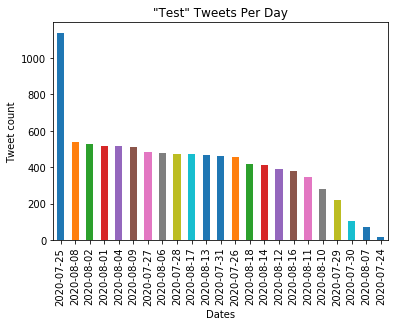

In [63]:
yes_test.date.value_counts().plot(kind='bar')
plt.title('"Test" Tweets Per Day')
plt.xlabel('Dates')
plt.ylabel('Tweet count')

In [60]:
yes_test['date'] = yes_test['date'].dt.strftime('%Y-%m-%d')

C:\Users\thathrav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
# Extract only the date from the 'date' column by removing the time details
yes_test.date = yes_test.date.apply(lambda x : x.rsplit(maxsplit = len(x.split())-1)[0])
yes_test.head()

C:\Users\thathrav\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,date,text
16,2020-07-25,July 25 #COVID19 update\n#TamilNadu - 6988\nDi...
31,2020-07-25,Actor @VishalKOfficial and his father Mr.G.K.R...
47,2020-07-25,Coronavirus Testing Fiasco: St Mirren have ple...
48,2020-07-25,Coronavirus Testing Fiasco: St Mirren have ple...
50,2020-07-25,Coronavirus Testing Fiasco: St Mirren have ple...


Text(0,0.5,'Tweet count')

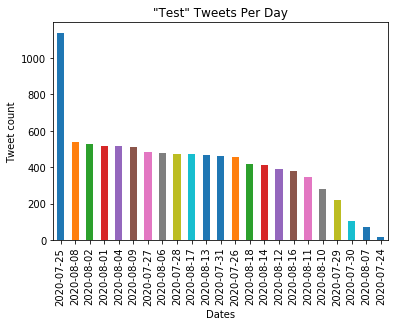

In [62]:
yes_test.date.value_counts().plot(kind='bar')
plt.title('"Test" Tweets Per Day')
plt.xlabel('Dates')
plt.ylabel('Tweet count')

# Analysis

From the bar graph above, it is seen that the word 'test' with respect to covid19 is being made several times with maximum tweets on 25th July, 2020 and at a similar rate on Aug 1st, 2nd, 4th, 7th, 8th, 9th, 10th and so on, and similarly in July. However, there were many days when tweets related to 'test' was not at all made.

This shows that people are actively to speaking about covid testing now.